SPACESHIP TITANIC

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission_df = pd.read_csv("sample_submission.csv")

# Preprocess data
# For simplicity, we'll drop some features and handle missing values
features = ['PassengerId', 'HomePlanet', 'Age', 'CryoSleep', 'Name', 'Destination']
X_train = train_df[features]
y_train = train_df['Transported']
X_test = test_df[features]

# Convert categorical variables to numerical
X_train = pd.get_dummies(X_train, columns=['Destination'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Destination'], drop_first=True)

# Drop non-numeric columns
X_train.drop(columns=['PassengerId', 'HomePlanet', 'CryoSleep', 'Name'], inplace=True)
X_test.drop(columns=['PassengerId', 'HomePlanet', 'CryoSleep', 'Name'], inplace=True)

# Handle missing values in numeric columns (fill with median)
numeric_cols = X_train.select_dtypes(include=['number']).columns
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].median())

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict survival probabilities for test data
predictions = model.predict_proba(X_test)[:, 1]

# Format predictions as DataFrame
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported': predictions})

# Convert probabilities to binary predictions
submission_df['Transported'] = submission_df['Transported'].apply(lambda x: False if x < 0.5 else True)

# Format PassengerId as required (assuming it's already in the correct format)
submission_df['PassengerId'] = submission_df['PassengerId'].astype(str) + '_01'

# Output predictions as CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


Submission file created successfully!


In [8]:
 pip install --upgrade pip

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\soni\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



                                              0.0/15.8 MB ? eta -:--:--
                                              0.3/15.8 MB 16.6 MB/s eta 0:00:01
     -                                        0.5/15.8 MB 6.3 MB/s eta 0:00:03
     -                                        0.8/15.8 MB 6.1 MB/s eta 0:00:03
     --                                       1.0/15.8 MB 5.7 MB/s eta 0:00:03
     ---                                      1.2/15.8 MB 5.6 MB/s eta 0:00:03
     ---                                      1.4/15.8 MB 5.4 MB/s eta 0:00:03
     ----                                     1.6/15.8 MB 5.2 MB/s eta 0:00:03
     ----                                     1.8/15.8 MB 5.1 MB/s eta 0:00:03
     -----                                    2.1/15.8 MB 5.0 MB/s eta 0:00:03
     -----                                    2.4/15.8 MB 5.0 MB/s eta 0:00:03
     ------                                   2.6/15.8 MB 5.0 MB/s eta 0:00:03
     -------                                  2.9/15.8 MB 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Step 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ["HomePlanet", "CryoSleep", "Destination", "VIP"]:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Fill missing values
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Extract Deck from Cabin
train_df['Deck'] = train_df['Cabin'].str[0]
test_df['Deck'] = test_df['Cabin'].str[0]

# Encode Deck
deck_encoder = LabelEncoder()
train_df['Deck'] = deck_encoder.fit_transform(train_df['Deck'].fillna('Unknown'))
test_df['Deck'] = deck_encoder.transform(test_df['Deck'].fillna('Unknown'))

# Step 3: Feature Selection
features = ["HomePlanet", "CryoSleep", "Deck", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Step 4: Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df["Transported"], test_size=0.2, random_state=42)

# Step 5: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Model Evaluation
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Step 7: Prediction
test_predictions = model.predict(test_df[features])
test_df["Transported"] = test_predictions

# Output the results
test_df[["PassengerId", "Transported"]].to_csv("predictions.csv", index=False)


TypeError: Cannot convert [['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']] to numeric

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load the Data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Step 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ["HomePlanet", "CryoSleep", "Destination", "VIP"]:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Fill missing values
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Extract Deck from Cabin
train_df['Deck'] = train_df['Cabin'].str[0]
test_df['Deck'] = test_df['Cabin'].str[0]

# Encode Deck
deck_encoder = LabelEncoder()
train_df['Deck'] = deck_encoder.fit_transform(train_df['Deck'].fillna('Unknown'))
test_df['Deck'] = deck_encoder.transform(test_df['Deck'].fillna('Unknown'))

# Step 3: Feature Selection
features = ["HomePlanet", "CryoSleep", "Deck", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Step 4: Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df["Transported"], test_size=0.2, random_state=42)

# Step 5: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Model Evaluation
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Step 7: Prediction
test_predictions = model.predict(test_df[features])
test_df["Transported"] = test_predictions

# Output the results
test_df[["PassengerId", "Transported"]].to_csv("predictions.csv", index=False)


TypeError: Cannot convert [['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']] to numeric

Ipl Predictor


In [9]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB ? eta -:--:--
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 607.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install ipywidgets


   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -------------------------------------- - 133.1/139.4 kB ? eta -:--:--
   -------------------------------------- - 133.1/139.4 kB ? eta -:--:--
   -------------------------------------- - 133.1/139.4 kB ? eta -:--:--
   -------------------------------------- 139.4/139.4 kB 916.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ------------------------------------- - 204.8/215.0 kB 13.0 MB/s eta 0:00:01
   ------------------------------------- - 204.8/215.0 kB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 215.0/215.0 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/2.3 MB 7.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.3 MB 6.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.3 MB 5.4 MB/s eta 0:00:01
   ---------------- -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf
ipl = pd.read_csv('ipl_data.csv')
ipl.head()
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
X = df.drop(['total'], axis =1)
y = df['total']
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output
		

		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)





Epoch 1/50

832/832 [==============================] - 14s 14ms/step - loss: 32.6237 - val_loss: 22.4916
Epoch 2/50
832/832 [==============================] - 10s 12ms/step - loss: 22.3498 - val_loss: 22.0293
Epoch 3/50
832/832 [==============================] - 12s 14ms/step - loss: 22.2930 - val_loss: 21.9468
Epoch 4/50
832/832 [==============================] - 12s 14ms/step - loss: 22.2335 - val_loss: 21.9157
Epoch 5/50
832/832 [==============================] - 13s 15ms/step - loss: 22.2008 - val_loss: 22.0152
Epoch 6/50
832/832 [==============================] - 8s 10ms/step - loss: 22.1688 - val_loss: 21.8034
Epoch 7/50
832/832 [==============================] - 7s 9ms/step - loss: 22.1136 - val_loss: 22.0880
Epoch 8/50
832/832 [==============================] - 8s 9ms/step - loss: 22.0940 - val_loss: 22.3486
Epoch 9/50
832/832 [==============================] - 9s 11ms/step - loss: 22.0756 - val_loss: 21.8144
Epoch 10/50
832/832 [==============================] - 8s 10ms/ste

KeyboardInterrupt: 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the IPL data
ipl_data = pd.read_csv('ipl_data24_ver11.csv')

# Extract relevant features
ipl_data['First Innings Score'] = ipl_data['First Innings Score'].str.extract('(\d+)').astype(int)
ipl_data['Second Innings Score'] = ipl_data['Second Innings Score'].str.extract('(\d+)').astype(int)
ipl_data['Match_Number'] = ipl_data['Match_Number'].str.extract('(\d+)').astype(int)
ipl_data['won_by'] = ipl_data['won_by'].str.extract('(\d+)').astype(int)
ipl_data['Date'] = pd.to_datetime(ipl_data['Date'], errors='coerce')

# Encode categorical features
label_encoders = {}
for column in ['First Team', 'Second Team', 'Stadium', 'Winning_team']:
    le = LabelEncoder()
    ipl_data[column] = le.fit_transform(ipl_data[column])
    label_encoders[column] = le

# Drop unnecessary columns
ipl_data.drop(['Date'], axis=1, inplace=True)
# Check for missing values
missing_values = ipl_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values with appropriate values or drop rows/columns with missing values
# For example:
# ipl_data.fillna(method='ffill', inplace=True)  # Forward fill missing values
# ipl_data.dropna(inplace=True)  # Drop rows with missing values

# Check data types of each column
print("Data Types:")
print(ipl_data.dtypes)


# Split the data into features and target variable
X = ipl_data.drop(['Winning_team'], axis=1)
y = ipl_data['Winning_team']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\soni\AppData\Local\Temp\ipykernel_5776\610234030.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ipl_data['Date'] = pd.to_datetime(ipl_data['Date'], errors='coerce')


Missing Values:
First Team              0
First Innings Score     0
Second Team             0
Second Innings Score    0
Match_Number            0
Stadium                 0
Winning_team            0
won_by                  0
dtype: int64
Data Types:
First Team              int32
First Innings Score     int32
Second Team             int32
Second Innings Score    int32
Match_Number            int32
Stadium                 int32
Winning_team            int32
won_by                  int32
dtype: object
Accuracy: 0.3333333333333333


In [5]:
# Check for missing values
missing_values = ipl_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values with appropriate values or drop rows/columns with missing values
# For example:
# ipl_data.fillna(method='ffill', inplace=True)  # Forward fill missing values
# ipl_data.dropna(inplace=True)  # Drop rows with missing values

# Check data types of each column
print("Data Types:")
print(ipl_data.dtypes)


Missing Values:
First Team              0
First Innings Score     0
Second Team             0
Second Innings Score    0
Match_Number            0
Stadium                 0
Winning_team            0
won_by                  0
dtype: int64
Data Types:
First Team              int32
First Innings Score     int32
Second Team             int32
Second Innings Score    int32
Match_Number            int32
Stadium                 int32
Winning_team            int32
won_by                  int32
dtype: object


In [9]:
import pandas as pd
from io import StringIO


# Load the IPL match data
ipl_data = """
Date,First Team,First Innings Score,Second Team,Second Innings Score,Match_Number,Stadium,Winning_team,won_by
" Sun, Apr 14 - 7:00 PM ", CSK ," 206/4, (20 ov) ", MI ," 186/6, (20 ov) ", 29th T20,Wankhede Stadium • Mumbai , Chennai Super Kings , 20 runs. 
" Sun, Apr 14 - 3:00 PM ", LSG ," 161/7, (20 ov) ", KKR ," 162/2, (15.4 ov) ", 28th T20,Eden Gardens • Kolkata , Kolkata Knight Riders , 8 wickets 
# Add the rest of the data here
"""

# Parse the data into a DataFrame
ipl_df = pd.read_csv(pd.compat.StringIO(ipl_data))

# Drop unnecessary columns
columns_to_drop = ['Match_Number', 'Stadium', 'won_by']
ipl_df.drop(columns=columns_to_drop, inplace=True)

# Clean the data (remove extra spaces, convert scores to numeric)
ipl_df['First Innings Score'] = ipl_df['First Innings Score'].str.extract('(\d+)').astype(float)
ipl_df['Second Innings Score'] = ipl_df['Second Innings Score'].str.extract('(\d+)').astype(float)

# Handle missing values if any
ipl_df.dropna(inplace=True)

# Encode categorical variables if needed

# Display the preprocessed data
print(ipl_df.head())
# Feature Engineering
# Create additional features if needed (e.g., team rankings, venue statistics)

# Split the data into features (X) and target variable (y)
X = ipl_df.drop(columns=['Winning_team'])
y = ipl_df['Winning_team']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Assume 'upcoming_match_features' contains features for the upcoming match
# Make predictions for the upcoming match
upcoming_match_prediction = model.predict(upcoming_match_features)
print("Predicted winning team:", upcoming_match_prediction)


AttributeError: module 'pandas.compat' has no attribute 'StringIO'

C:\Users\soni\AppData\Local\Temp\ipykernel_7516\2579320883.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv("match_data.csv")


------------


KeyError: 'city'

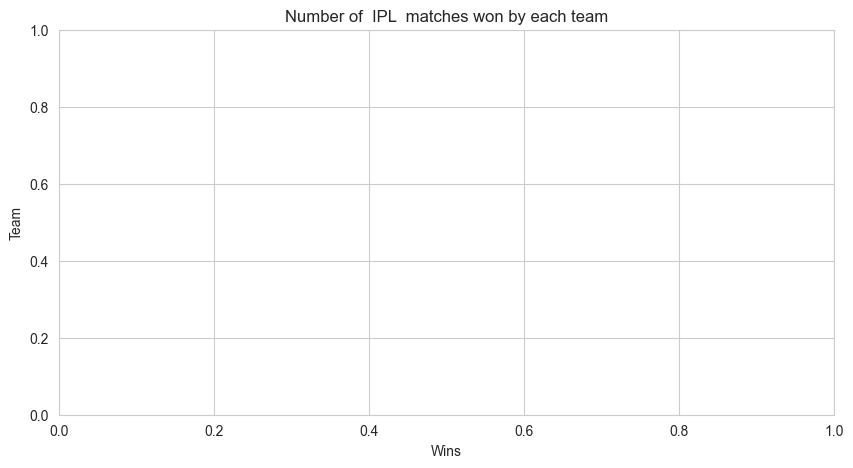

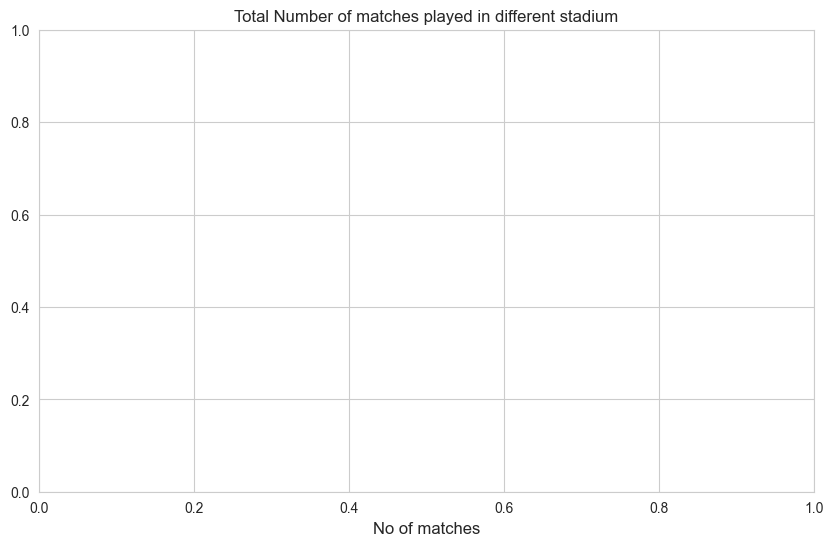

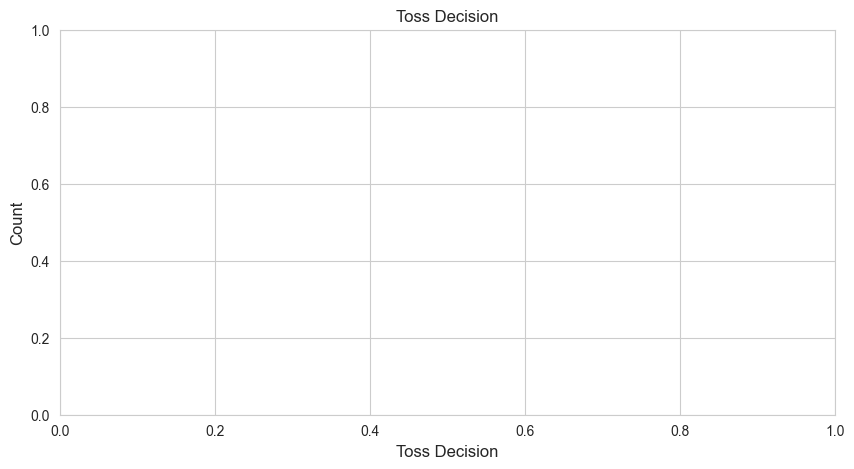

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn
# Load both CSV files
match_data = pd.read_csv("match_data.csv")
match_info_data = pd.read_csv("match_info_data.csv")

# Merge both datasets on a common column if applicable, assuming it's 'id'
data = pd.merge(match_data, match_info_data, on='season')
#print(data)
data.head()
data.describe()
data.isnull().sum()
data = data.iloc[:,:-1]
data.dropna(inplace=True)
data["team1"].unique()
#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
plt.figure(figsize = (10,5))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')
plt.figure(figsize = (10,6))
#sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
#plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')
plt.figure(figsize = (10,5))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())
data.drop(["id","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)
X = data.drop(["winner"], axis=1)
y = data["winner"]
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)